# Importing Libraries & Data

In [48]:
import pandas as pd;
train = pd.read_csv('../input/melanoma-tumor-size-prediction-machinehack/Train.csv');
test= pd.read_csv('../input/melanoma-tumor-size-prediction-machinehack/Test.csv');
ss = pd.read_csv('../input/melanoma-tumor-size-prediction-machinehack/sample_submission.csv')

In [30]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor

In [32]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


# Missing Values

In [49]:
train.isnull().sum()/train.shape[0]*100

mass_npea         0.0
size_npear        0.0
malign_ratio      0.0
damage_size       0.0
exposed_area      0.0
std_dev_malign    0.0
err_malign        0.0
malign_penalty    0.0
damage_ratio      0.0
tumor_size        0.0
dtype: float64

In [50]:
test.isnull().sum()/test.shape[0]*100

mass_npea         0.0
size_npear        0.0
malign_ratio      0.0
damage_size       0.0
exposed_area      0.0
std_dev_malign    0.0
err_malign        0.0
malign_penalty    0.0
damage_ratio      0.0
dtype: float64

No missing Values. We can straight get into business

# Visualization

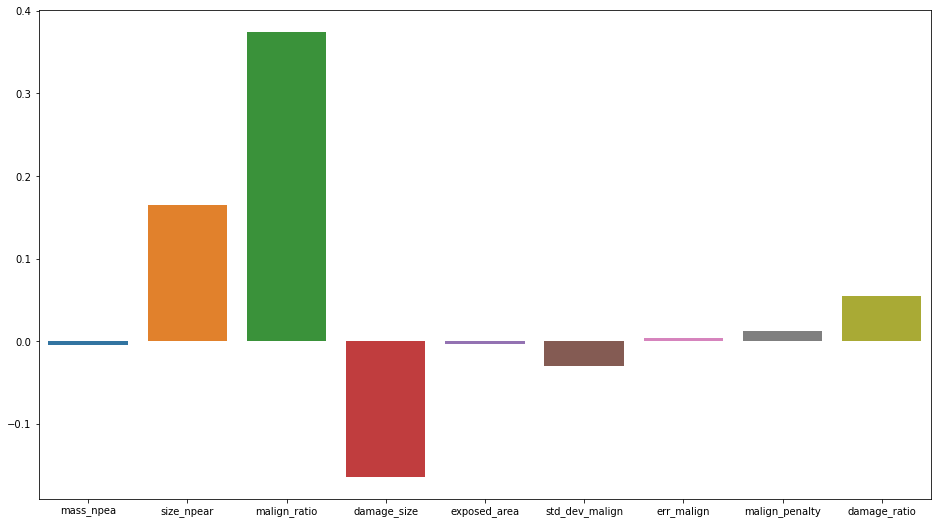

In [34]:
plt.figure(figsize = (16,9))
fineTech_appData3 = train.drop(['tumor_size'], axis = 1) 
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(train['tumor_size']))



# Train Test Split

In [35]:
m = train[['size_npear', 'malign_ratio', 'damage_size',  'damage_ratio']];
y = train[['tumor_size']]

In [37]:
test1 = test[['size_npear', 'malign_ratio', 'damage_size',  'damage_ratio']]

In [38]:
mtrain, mtest, ntrain, ntest = train_test_split(m, y, test_size = 0.2, random_state = 55)

# Modeling

In [39]:
xx = XGBRegressor();
xx.fit(mtrain, ntrain);
xx.score(mtest, ntest)

0.356673202759484

In [40]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb.fit(mtrain,ntrain);
lgb.score(mtest, ntest)

0.38730653435863704

In [41]:
dc = DecisionTreeRegressor();
dc.fit(mtrain, ntrain);
dc.score(mtest, ntest)

-0.18289919086152628

In [42]:
lin = LinearRegression();
lin.fit(mtrain, ntrain);
lin.score(mtest, ntest)

0.24753965610831963

In [43]:
rf = RandomForestRegressor();
rf.fit(mtrain, ntrain);
rf.score(mtest, ntest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.3925794938416103

In [44]:
knn = KNeighborsRegressor();
knn.fit(mtrain, ntrain);
knn.score(mtest, ntest)

0.20365268531238068

In [47]:
log = Lasso()
log.fit(mtrain, ntrain);
log.score(mtest, ntest)

0.24917766524165985

# Prediction

Random Forest seems to be the most effective model in this case. So, we can use it to predict the result

In [ ]:
m_pred = rfc.predict(test1);
m_predData = pd.DataFrame(m_pred, columns = ['tumor_size']);
m_predData.set_index('tumor_size').to_csv('submission.csv')